This notebook processes the UV-vis data from 8/22/24 (Batch 4) and 9/10/24 (Batch 6) of Airbrusehd P3HT in Toluene on PDMS.

Note there is no unpolarized data for 8/22/24 (Batch 4)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def plot_polarized_UVvis(_df, bw=None, ylim=(0,1.05),title="", plot_transmittance = False):
    # Set up figure with 3 subplots for polarized and unpolarized UV-vis data
    fig, axs = plt.subplots(3, 1, figsize=(5, 10))
    fig.suptitle(title, fontsize=16, fontweight='bold')

    if plot_transmittance:
        for i, column in enumerate([col for col in _df.columns if 'Wavelength' not in col]):
            print(column)
            _df[column] = AtoT(_df[column].values)
        _df
    # Generate colors for plotting
    colors = cm.Spectral([i / ((_df.shape[1] - 3)//3) for i in range((_df.shape[1] - 1)//3)])
    # Plot Vertical Absorbance (columns with 'H' wichic are parrallel to strain)
    for i, column in enumerate([col for col in _df.columns if 'H' in col and 'baseline' not in col]):
        axs[0].plot(_df['Wavelength'],_df[column], label=column, color=colors[i])

    # axs[0].set_title(f'{'Transmittance' if plot_transmittance else 'Absorbance'} vs. Wavelength for ||-polarized light')
    axs[0].set_xlabel('Wavelength (nm)')
    axs[0].set_ylabel(f'{'Transmittance' if plot_transmittance else 'Absorbance'}')
    axs[0].set_xlim(bw)
    axs[0].set_ylim(ylim)
    axs[0].legend(title='||-Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Plot Horizontal Absorbance (columns with 'V' which are perp to strain)
    for i, column in enumerate([col for col in _df.columns if 'V' in col and 'baseline' not in col]):
        axs[1].plot(_df['Wavelength'],_df[column], label=column, color=colors[i])

    # axs[1].set_title(f'{'Transmittance' if plot_transmittance else 'Absorbance'} vs. Wavelength for ⊥-polarized light')
    axs[1].set_xlabel('Wavelength (nm)')
    axs[1].set_ylabel(f'{'Transmittance' if plot_transmittance else 'Absorbance'}')
    axs[1].set_xlim(bw)
    axs[1].set_ylim(ylim)
    axs[1].legend(title='⊥-Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Plot Unpolarized Absorbance (columns without 'H' or 'V')
    for i, column in enumerate([col for col in _df.columns if 'H' not in col and 'V' not in col and 'Wavelength' not in col and 'baseline' not in col]):
        axs[2].plot(_df['Wavelength'], _df[column], label=column, color=colors[i])

    # axs[2].set_title(f'{'Transmittance' if plot_transmittance else 'Absorbance'} vs. Wavelength for Unpolarized light')
    axs[2].set_xlabel('Wavelength (nm)')
    axs[2].set_ylabel(f'{'Transmittance' if plot_transmittance else 'Absorbance'}')
    axs[2].set_xlim(bw)
    axs[2].set_ylim(ylim)
    axs[2].legend(title='Unpolarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    
    return fig,axs

def TtoA(T):
    return -np.log10(T) 
    
def AtoT(A):
    return 10**(-A)

In [3]:

# Load the CSV file into a pandas DataFrame, with metadata
sample_info = [
    {
        'file_path': ['Batch 6 6 - Sample 1 Unpolarized Data 9-10-24.csv',
                    'Batch 6 6 - Sample 1 Horizontal Data 9-10-24.csv',
                    'Batch 6 6 - Sample 1 Vertical Data  9-10-24.csv'],
        's_num': 1,
        'date_str': "2024-9-10",
        'method_str': "airbrushed",
        'material_str': 'P3HT',
        'solvent_str': 'Toluene'
    },
    {
        'file_path': ['/Users/adrian/Documents/UV-vis/Carlos_P3HT_8-22-24/Polarized Batch 4 0% Samples  - Horizontal 1.csv',
                    '/Users/adrian/Documents/UV-vis/Carlos_P3HT_8-22-24/Polarized Batch 4 0% Samples  - Vertical 1.csv']
        's_num': 2,
        'date_str': "08-22-24",
        'method_str': "airbrushed",
        'material_str': 'P3HT',
        'solvent_str': 'Toluene'
    }
]

P3HT_TOL_082224_filepaths = ['/Users/adrian/Documents/UV-vis/Carlos_P3HT_8-22-24/Polarized Batch 4 0% Samples  - Horizontal 1.csv',
'/Users/adrian/Documents/UV-vis/Carlos_P3HT_8-22-24/Polarized Batch 4 0% Samples  - Horizontal 2.csv',
'/Users/adrian/Documents/UV-vis/Carlos_P3HT_8-22-24/Polarized Batch 4 0% Samples  - Vertical 1.csv',
'/Users/adrian/Documents/UV-vis/Carlos_P3HT_8-22-24/Polarized Batch 4 0% Samples  - Vertical 2.csv']

i=0
file_path = sample_info[i]['file_path']
s_num = sample_info[i]['s_num']
date_str = sample_info[i]['date_str']
method_str = sample_info[i]['method_str']
material_str = sample_info[i]['material_str']
solvent_str = sample_info[i]['solvent_str']

print(f"File Path: {file_path}\n Sample Number: {s_num}\n Date: {date_str}\n Method: {method_str}")

# file_path = 'Carlos_P3HT_9-8-24/Batch 5 Samples - Sample 5 Raw Data.csv'; s_num = 5; date_str = "2024-09-08"; method_str="spincoated"
# # file_path = 'Carlos_P3HT_9-8-24/Batch 5 Samples - Sample 6 Raw Data.csv'; s_num = 6; date_str = "2024-09-08"; method_str="spincoated"

dfU = pd.read_csv(file_path[0])
dfH = pd.read_csv(file_path[1])
dfV = pd.read_csv(file_path[2])

raw_df = dfU.merge(dfH, on='Wavelength', suffixes=('', 'H'))
raw_df = raw_df.merge(dfV, on='Wavelength', suffixes=('', 'V'))

raw_df


File Path: ['Batch 6 6 - Sample 1 Unpolarized Data 9-10-24.csv', 'Batch 6 6 - Sample 1 Horizontal Data 9-10-24.csv', 'Batch 6 6 - Sample 1 Vertical Data  9-10-24.csv']
 Sample Number: 1
 Date: 2024-9-10
 Method: airbrushed


,Wavelength,0%,10%,20%,30%,40%,50%,60%,70%,0%H,...,60%H,70%H,0%V,10%V,20%V,30%V,40%V,50%V,60%V,70%V
0,300.0,0.457216,0.478148,0.481228,0.469332,0.473833,0.458620,0.451199,0.438377,4.000000,...,4.000000,4.000000,3.994946,4.000000,3.994916,4.000000,3.983605,4.000000,4.000000,4.000000
1,300.5,0.454941,0.476200,0.479324,0.467723,0.472249,0.457361,0.449795,0.436902,4.000000,...,4.000000,3.989443,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
2,301.0,0.452624,0.473706,0.477346,0.465742,0.470621,0.455572,0.448298,0.435505,4.000000,...,4.000000,3.974483,4.000000,3.961903,4.000000,3.953994,4.000000,4.000000,4.000000,4.000000
3,301.5,0.450214,0.471376,0.475248,0.463898,0.468571,0.453607,0.446700,0.433996,4.000000,...,3.983164,3.988414,3.951279,3.994624,4.000000,4.000000,4.000000,3.988476,4.000000,4.000000
4,302.0,0.447382,0.469059,0.472873,0.461861,0.466757,0.451980,0.444896,0.432539,4.000000,...,4.000000,3.950732,4.000000,4.000000,4.000000,3.988287,3.919370,3.982591,3.994311,3.977106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,898.0,0.082480,0.134912,0.157787,0.165293,0.169612,0.167601,0.167448,0.162517,0.152136,...,0.238379,0.234160,0.243728,0.292363,0.315329,0.323084,0.327700,0.326327,0.326498,0.321959
1197,898.5,0.082442,0.134849,0.157756,0.165234,0.169562,0.167584,0.167372,0.162440,0.151567,...,0.237909,0.233654,0.242049,0.290714,0.313609,0.321153,0.325990,0.324658,0.324867,0.320314
1198,899.0,0.082527,0.134927,0.157850,0.165269,0.169625,0.167602,0.167415,0.162478,0.151556,...,0.237766,0.233474,0.240640,0.289264,0.312156,0.319286,0.324523,0.323165,0.323378,0.318853
1199,899.5,0.082585,0.134958,0.157837,0.165289,0.169593,0.167537,0.167394,0.162408,0.150999,...,0.237069,0.232836,0.238836,0.287417,0.310305,0.317560,0.322639,0.321303,0.321403,0.316897


In [4]:
### load baseline data for polaizer  ####
h_file = "../baselines/Polarized Batch 4 0% Samples  - Baseline Horizontal.csv"
v_file = "../baselines/Polarized Batch 4 0% Samples  - Baseline Vertical.csv"

df_h = pd.read_csv(h_file)
df_v = pd.read_csv(v_file)

#add baseleine to df
raw_df['V_baseline'] = df_v['Average']
raw_df['H_baseline'] = df_h['Average']

raw_df

,Wavelength,0%,10%,20%,30%,40%,50%,60%,70%,0%H,...,0%V,10%V,20%V,30%V,40%V,50%V,60%V,70%V,V_baseline,H_baseline
0,300.0,0.457216,0.478148,0.481228,0.469332,0.473833,0.458620,0.451199,0.438377,4.000000,...,3.994946,4.000000,3.994916,4.000000,3.983605,4.000000,4.000000,4.000000,4.000000,4.000000
1,300.5,0.454941,0.476200,0.479324,0.467723,0.472249,0.457361,0.449795,0.436902,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.973701,4.000000
2,301.0,0.452624,0.473706,0.477346,0.465742,0.470621,0.455572,0.448298,0.435505,4.000000,...,4.000000,3.961903,4.000000,3.953994,4.000000,4.000000,4.000000,4.000000,3.994414,3.992867
3,301.5,0.450214,0.471376,0.475248,0.463898,0.468571,0.453607,0.446700,0.433996,4.000000,...,3.951279,3.994624,4.000000,4.000000,4.000000,3.988476,4.000000,4.000000,3.980757,3.989014
4,302.0,0.447382,0.469059,0.472873,0.461861,0.466757,0.451980,0.444896,0.432539,4.000000,...,4.000000,4.000000,4.000000,3.988287,3.919370,3.982591,3.994311,3.977106,4.000000,3.992784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,898.0,0.082480,0.134912,0.157787,0.165293,0.169612,0.167601,0.167448,0.162517,0.152136,...,0.243728,0.292363,0.315329,0.323084,0.327700,0.326327,0.326498,0.321959,0.165349,0.072880
1197,898.5,0.082442,0.134849,0.157756,0.165234,0.169562,0.167584,0.167372,0.162440,0.151567,...,0.242049,0.290714,0.313609,0.321153,0.325990,0.324658,0.324867,0.320314,0.163506,0.072257
1198,899.0,0.082527,0.134927,0.157850,0.165269,0.169625,0.167602,0.167415,0.162478,0.151556,...,0.240640,0.289264,0.312156,0.319286,0.324523,0.323165,0.323378,0.318853,0.161557,0.071873
1199,899.5,0.082585,0.134958,0.157837,0.165289,0.169593,0.167537,0.167394,0.162408,0.150999,...,0.238836,0.287417,0.310305,0.317560,0.322639,0.321303,0.321403,0.316897,0.159992,0.071622


Saved figure to Raw_Polarized_UVvis_S1_airbrushed_P3HT_2024-9-10.pdf


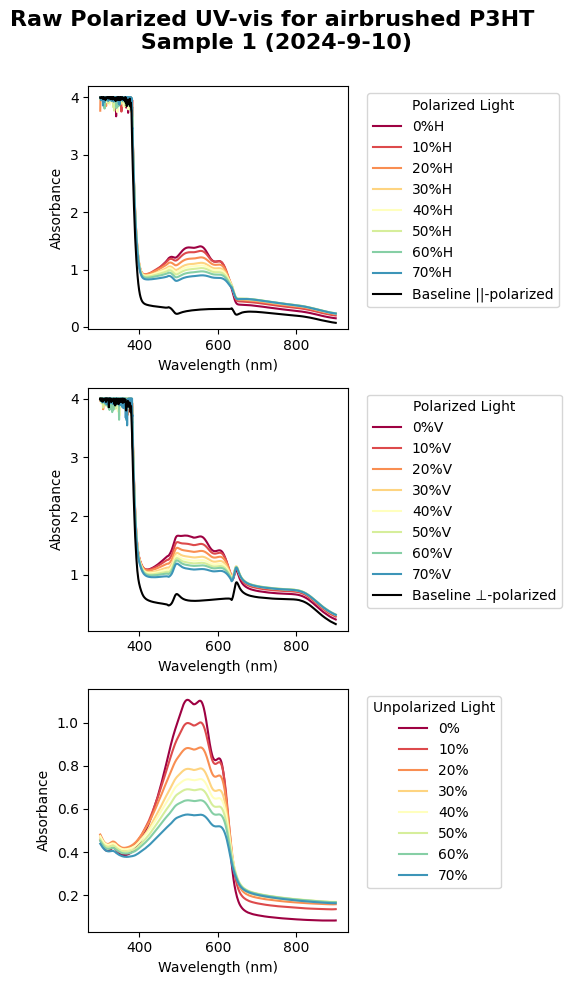

In [5]:
##### plotting the raw data #####
fig,axs = plot_polarized_UVvis(raw_df, bw=None, ylim=(None),title=f'Raw Polarized UV-vis for {method_str} {material_str}\n Sample {s_num} ({date_str})\n')
axs[0].plot(raw_df['Wavelength'], raw_df['H_baseline'], label="Baseline ||-polarized", color='k')
axs[1].plot(raw_df['Wavelength'], raw_df['V_baseline'], label="Baseline ⊥-polarized", color='k')
axs[0].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

save_str = f"Raw_Polarized_UVvis_S{s_num}_{method_str}_P3HT_{date_str}.pdf"
fig.savefig(save_str, format='pdf')
print(f"Saved figure to {save_str}")

In [6]:
#### baseline correction ####
# formula = r"$A_{\text{corrected}} = A_{\text{raw}} - A_{\text{baseline}}$"

df_corrected = raw_df.copy()
for i, column in enumerate([col for col in df_corrected.columns if 'H' in col and 'baseline' not in col]):
    df_corrected[column] = raw_df[column].values - raw_df['H_baseline'].values

for i, column in enumerate([col for col in df_corrected.columns if 'V' in col and 'baseline' not in col]):
    df_corrected[column] = raw_df[column].values - raw_df['V_baseline'].values

df_normalized = df_corrected.copy

max0= max(df_corrected['0%'])
max0H = max(df_corrected['0%H'])
max0V = max(df_corrected['0%V'])

print("max0strain= " , max0V)


max0strain=  1.1011147000000001


In [7]:
df_normalized = df_corrected.copy()

max0= max(df_corrected['0%'])
max0H = max(df_corrected['0%H'])
max0V = max(df_corrected['0%V'])

for i, column in enumerate([col for col in df_corrected.columns if 'H' in col and 'baseline' not in col]):
    df_normalized[column] = df_corrected[column].values / max0H

for i, column in enumerate([col for col in df_corrected.columns if 'V' in col and 'baseline' not in col]):
    df_normalized[column] = df_corrected[column].values / max0V

for i, column in enumerate([col for col in df_corrected.columns if 'V' not in col and 'H' not in col and 'baseline' not in col and 'Wavelength' not in col]):
    df_normalized[column] = df_corrected[column].values / max0

df_normalized

,Wavelength,0%,10%,20%,30%,40%,50%,60%,70%,0%H,...,0%V,10%V,20%V,30%V,40%V,50%V,60%V,70%V,V_baseline,H_baseline
0,300.0,0.413494,0.432425,0.435210,0.424452,0.428522,0.414764,0.408053,0.396457,0.000000,...,-0.004590,0.000000,-0.004617,0.000000,-0.014889,0.000000,0.000000,0.000000,4.000000,4.000000
1,300.5,0.411437,0.430663,0.433488,0.422997,0.427090,0.413625,0.406783,0.395123,0.000000,...,0.023884,0.023884,0.023884,0.023884,0.023884,0.023884,0.023884,0.023884,3.973701,4.000000
2,301.0,0.409341,0.428407,0.431699,0.421205,0.425617,0.412008,0.405429,0.393859,0.006446,...,0.005073,-0.029526,0.005073,-0.036709,0.005073,0.005073,0.005073,0.005073,3.994414,3.992867
3,301.5,0.407162,0.426300,0.429802,0.419537,0.423764,0.410230,0.403984,0.392495,0.009929,...,-0.026771,0.012594,0.017476,0.017476,0.017476,0.007010,0.017476,0.017476,3.980757,3.989014
4,302.0,0.404601,0.424205,0.427654,0.417695,0.422123,0.408759,0.402352,0.391177,0.006521,...,0.000000,0.000000,0.000000,-0.010637,-0.073226,-0.015810,-0.005167,-0.020792,4.000000,3.992784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,898.0,0.074593,0.122011,0.142698,0.149487,0.153393,0.151574,0.151436,0.146976,0.071631,...,0.071181,0.115350,0.136207,0.143250,0.147442,0.146195,0.146351,0.142228,0.165349,0.072880
1197,898.5,0.074558,0.121954,0.142670,0.149433,0.153347,0.151559,0.151367,0.146907,0.071679,...,0.071330,0.115526,0.136319,0.143170,0.147563,0.146353,0.146543,0.142408,0.163506,0.072257
1198,899.0,0.074635,0.122024,0.142755,0.149465,0.153404,0.151575,0.151406,0.146941,0.072016,...,0.071821,0.115979,0.136769,0.143245,0.148001,0.146767,0.146961,0.142851,0.161557,0.071873
1199,899.5,0.074688,0.122053,0.142744,0.149483,0.153376,0.151516,0.151387,0.146878,0.071740,...,0.071604,0.115724,0.136510,0.143099,0.147711,0.146498,0.146589,0.142497,0.159992,0.071622


Saved figure to Corrected_Polarized_UVvis_S1_airbrushed_P3HT_2024-9-10.pdf


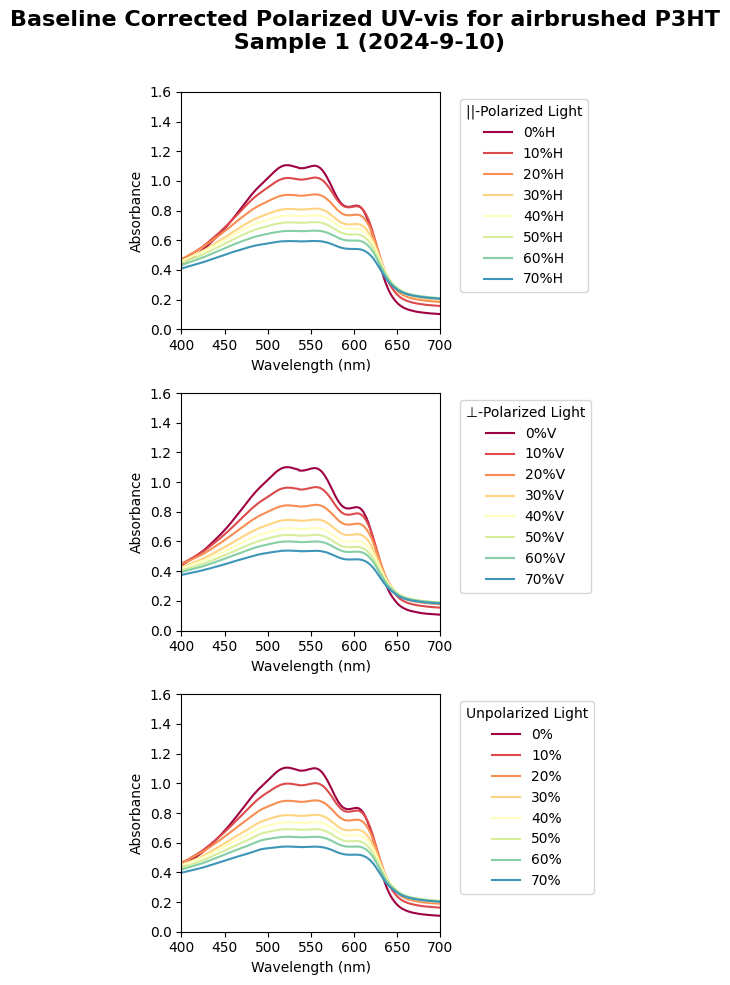

In [8]:
##### plotting final corected #####
fig,axs = plot_polarized_UVvis(df_corrected, title=f'Baseline Corrected Polarized UV-vis for {method_str} {material_str}\n Sample {s_num} ({date_str})\n', bw=(400,700), ylim = (0,1.6), plot_transmittance=False)
# axs[0].text(0.75, 0.9, formula, fontsize=12, ha='center', va='center', transform=axs[0].transAxes)

# #plot overides
# axs[0].plot(df_corrected['Wavelength'], df_corrected['H_baseline'], label="Baseline ||-polarized", color='k')
# axs[1].plot(df_corrected['Wavelength'], df_corrected['V_baseline'], label="Baseline ⊥-polarized", color='k')
# axs[0].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')
# axs[1].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')
# axs[2].set_ylim((.4,.8))

save_str = f"Corrected_Polarized_UVvis_S{s_num}_{method_str}_P3HT_{date_str}.pdf"
fig.savefig(save_str, format='pdf')
print(f"Saved figure to {save_str}")

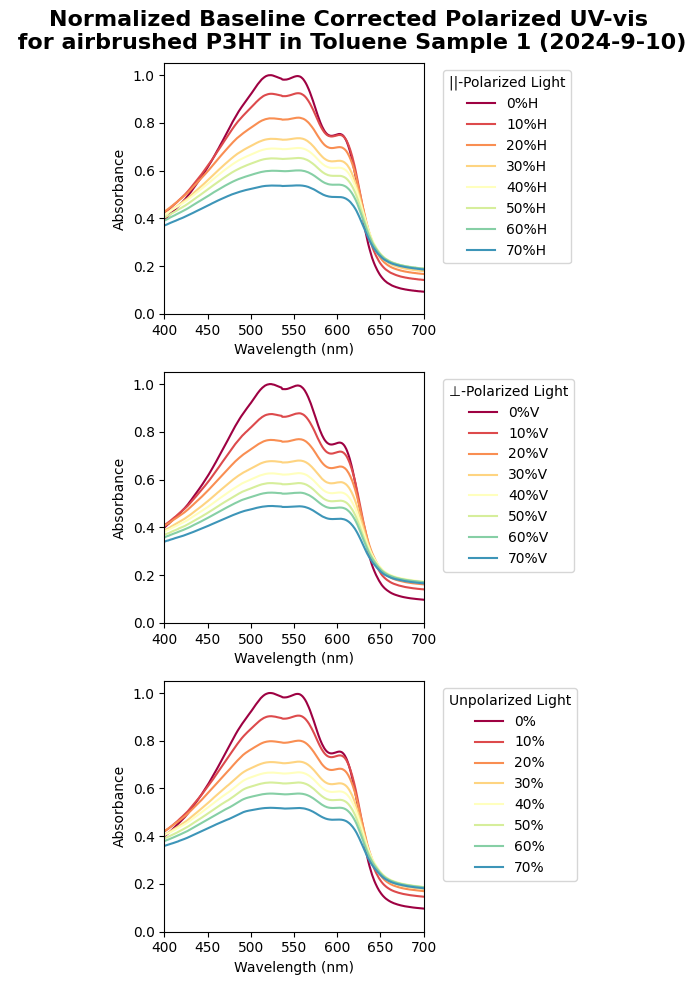

In [9]:
fig,axs = plot_polarized_UVvis(df_normalized, title=f'Normalized Baseline Corrected Polarized UV-vis\n for {method_str} {material_str} in {solvent_str} Sample {s_num} ({date_str})', bw=(400,700), ylim = (0,1.05), plot_transmittance=False)


In [10]:
#Save corrected data
data_save_str = f"Corrected_Polarized_UVvis_S{s_num}_{method_str}_P3HT_{date_str}.csv"
df_corrected.to_csv(data_save_str, index=False)

### Calculate the absorbance ratio

In [11]:
#load from file for modularity
peak00 = 606
peak01 = 557

df_absorbance_ratios = pd.DataFrame()

for i, sample in enumerate(sample_info):
    print(sample)
    df_corrected = pd.read_csv(data_save_str)

    # Get absorbance data for the peaks
    A00 = df_corrected[df_corrected['Wavelength'] == peak00]
    A01 = df_corrected[df_corrected['Wavelength'] == peak01]

    data_cols = [col for col in df_corrected.columns if col not in ['Wavelength', 'V_baseline', 'H_baseline']]    # Filter out the unwanted columns
    absorbance_ratio = A00[data_cols].values / A01[data_cols].values     # Calculate the absorbance ratio

    df_absorbance_ratio = pd.DataFrame(absorbance_ratio, columns=data_cols)
    df_absorbance_ratios = pd.concat([df_absorbance_ratios, df_absorbance_ratio], ignore_index=True)

    H_columns_str = [col for col in A00.columns if 'H' in col and 'baseline' not in col]
    V_columns_str = [col for col in A00.columns if 'V' in col and 'baseline' not in col]

    # print(H_columns_str, V_columns_str)
    # df.dichroic_ratio = A00[H_columns_str].values / A00[V_columns_str].values
    # df.dichroic_ratio

{'file_path': ['Batch 6 6 - Sample 1 Unpolarized Data 9-10-24.csv', 'Batch 6 6 - Sample 1 Horizontal Data 9-10-24.csv', 'Batch 6 6 - Sample 1 Vertical Data  9-10-24.csv'], 's_num': 1, 'date_str': '2024-9-10', 'method_str': 'airbrushed', 'material_str': 'P3HT', 'solvent_str': 'Toluene'}


In [12]:
absorbance_ratios_data_save_str = f"Absorbance_Ratios_UVvis_S{s_num}_{method_str}_{solvent_str}_P3HT_{date_str}.csv"
df_absorbance_ratios.to_csv(absorbance_ratios_data_save_str, index=False)
print(f"Saved to Absorbance Ratio data to {absorbance_ratios_data_save_str}")

Saved to Absorbance Ratio data to Absorbance_Ratios_UVvis_S1_airbrushed_Toluene_P3HT_2024-9-10.csv


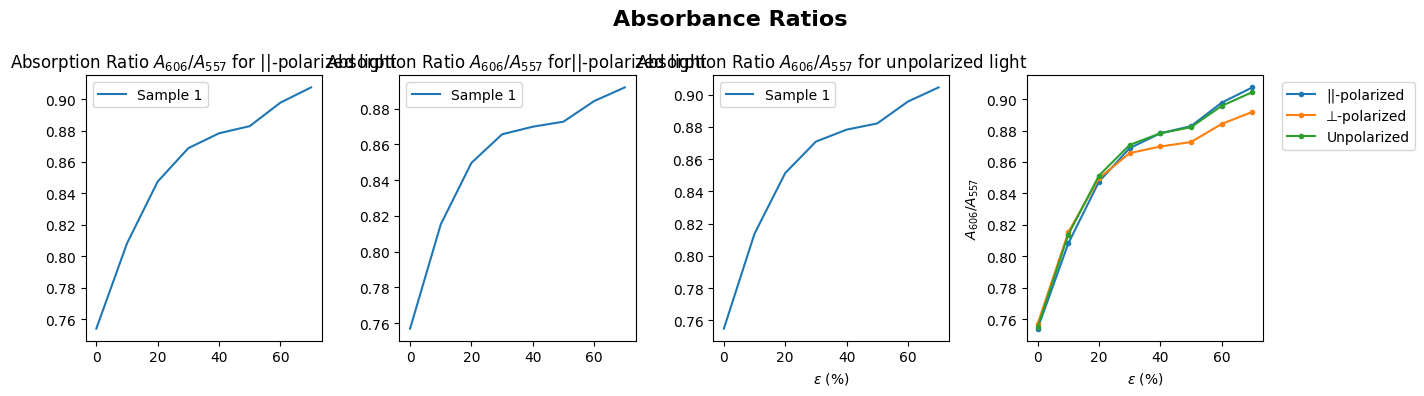

In [13]:
fig, axs = plt.subplots(1, 4, figsize=(14, 4))
fig.suptitle("Absorbance Ratios", fontsize=16, fontweight='bold')

# Loop through each row in the DataFrame (i.e., each sample)
for i, row in df_absorbance_ratios.iterrows():
    # Find the columns with 'H' and without 'baseline'
    H_columns_str = [col for col in df_absorbance_ratios.columns if 'H' in col and 'baseline' not in col]
    H_percents = [float(s.strip('%HV')) for s in H_columns_str]
    axs[0].plot(H_percents, row[H_columns_str], label=f"Sample {sample_info[i]['s_num']}")

    V_columns_str = [col for col in df_absorbance_ratios.columns if 'V' in col and 'baseline' not in col]
    V_percents = [float(s.strip('%HV')) for s in V_columns_str]
    axs[1].plot(V_percents, row[V_columns_str], label=f"Sample {sample_info[i]['s_num']}")

    unpolarized_columns_str = [col for col in df_corrected.columns if 'V' not in col and 'H' not in col and 'baseline' not in col and 'Wavelength' not in col]
    unpolaraized_percents = [float(s.strip('%HV')) for s in H_columns_str]
    axs[2].plot(unpolaraized_percents, row[unpolarized_columns_str], label=f"Sample {sample_info[i]['s_num']}")

    axs[3].plot(H_percents, row[H_columns_str], '.-',label=f"||-polarized")
    axs[3].plot(V_percents, row[V_columns_str], '.-', label=f"⊥-polarized")
    axs[3].plot(unpolaraized_percents, row[unpolarized_columns_str], '.-',label=f"Unpolarized")
    
    

    break
    
# Add legend and show plot
axs[0].set_title(rf'Absorption Ratio $A_{{606}}/A_{{557}}$ for ||-polarized light')
axs[1].set_title(rf'Absorption Ratio $A_{{606}}/A_{{557}}$ for||-polarized light')
axs[2].set_title(rf'Absorption Ratio $A_{{606}}/A_{{557}}$ for unpolarized light')
axs[2].set_xlabel(r'$\epsilon$ (%)')
# axs[0].set_title(f'Dichroic Ratio $A_{{||}}/A_{{\perp}}$ for ||-polarized light')

axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

axs[3].set_ylabel(rf'$A_{{606}}/A_{{557}}$')
axs[3].set_xlabel(rf'$\epsilon$ (%)')

fig.tight_layout()

In [14]:
### Dichroic Ratios ###
#todo

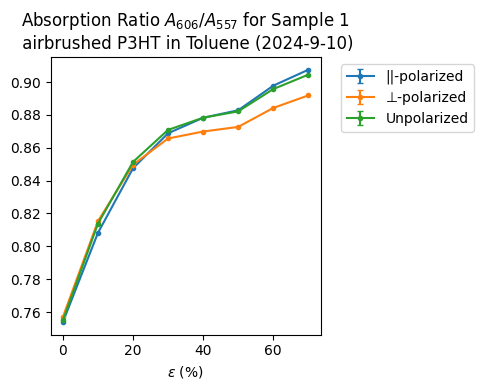

In [20]:
# Compute the mean and standard error for each column
mean_values = df_absorbance_ratios.mean()
standard_error = df_absorbance_ratios.sem()

H_columns_str = [col for col in df_absorbance_ratios.columns if 'H' in col and 'baseline' not in col]
H_percents = [float(s.strip('%HV')) for s in H_columns_str]

V_columns_str = [col for col in df_absorbance_ratios.columns if 'V' in col and 'baseline' not in col]
V_percents = [float(s.strip('%HV')) for s in V_columns_str]

unpolarized_columns_str = [col for col in df_corrected.columns if 'V' not in col and 'H' not in col and 'baseline' not in col and 'Wavelength' not in col]
unpolaraized_percents = [float(s.strip('%HV')) for s in H_columns_str]

# Plot the mean values with error bars for standard error
fig, axs = plt.subplots(1, 1, figsize=(5, 4))

axs.errorbar(H_percents, mean_values[H_columns_str], yerr=standard_error[H_columns_str], fmt='.-', label='||-polarized', capsize=2, capthick=1)
axs.errorbar(V_percents, mean_values[V_columns_str], yerr=standard_error[V_columns_str], fmt='.-', label='⊥-polarized',  capsize=2, capthick=1)
axs.errorbar(unpolaraized_percents, mean_values[unpolarized_columns_str], yerr=standard_error[unpolarized_columns_str], fmt='.-', label='Unpolarized', capsize=2, capthick=1)

# Customize plot
axs.set_title(f'Absorption Ratio $A_{{606}}/A_{{557}}$ for Sample {s_num}\n {method_str} P3HT in {solvent_str} ({date_str})')
axs.set_xlabel(r'$\epsilon$ (%)')
axs.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()
# axs.grid('on')